In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [40]:
m, a = 2, 0.9
df = lambda x, y: a*(1-y**2)/((1+m)*x**2 + y**2 + 1)
y_0 = 0


LEFT, RIGHT = 0, 1

In [34]:
def Eyler(df, y_0, n=10):
    h = (RIGHT - LEFT) / n
    x = np.linspace(LEFT, RIGHT, n)
    y = [y_0]
    for i in range(1, len(x)):
        y_k = y[-1]
        y.append(y_k + h * df(x[i], y_k))
    return (x, y)

## ранге-кутта

In [35]:
def Range_Kytt(df, y_0, n=10):
    h = (RIGHT - LEFT) / n
    x = np.linspace(LEFT, RIGHT, n)
    y = [y_0]
    for i in range(1, len(x)):
        y_k = y[-1]
        K1 = h * df(x[i], y_k)
        K2 = h * df(x[i] + h/2, y_k + K1/2)
        K3 = h * df(x[i] + h/2, y_k + K2/2)
        K4 =h * df(x[i] + h, y_k + K3)
    
        y.append(y_k + (K1 + 2 * K2 + 2 * K3 + K4) / 6)
    return (x, y)

# plot all

1.0


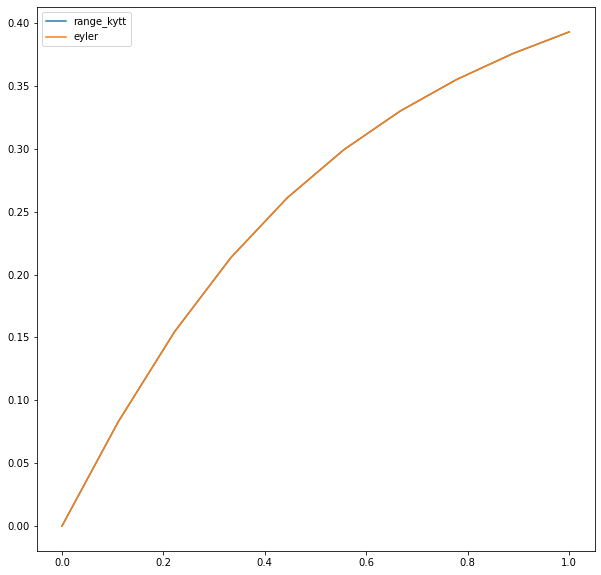

In [44]:
fig, ax = plt.subplots()

#df = lambda x, y: x**2 - 2*y
#y0 = 0

eyler = Eyler(df, y_0, 1000)
range_kytt = Range_Kytt(df, y_0, 10)
Y = [3/4*np.exp(-2*x)+x**2/2-x/2 + 1/4 for x in range_kytt[0]]

print(max([abs(Y[i] - range_kytt[1][i]) for i in range(len(Y))]))

#ax.plot(range_kytt[0], Y, label='func')
#ax.plot(eyler[0], eyler[1], label='eyler')
ax.plot(range_kytt[0], range_kytt[1], label='range_kytt')
ax.plot(range_kytt[0], range_kytt[1], label='eyler')
leg = ax.legend()

## Addams

In [45]:
def Addams(df, y_0, n=100):
    h = (RIGHT - LEFT) / n
    x = np.linspace(LEFT, RIGHT, n)
    y = [y_0*(LEFT - h), y_0]
    for i in range(1, len(x)):
        y_k = y[-1]
        y_k_1 = y[-2]
        
    
        y.append(y_k + h * (3/2 * df(x[i], y_k) - 1/2 * df(x[i-1], y_k_1)))
    y.pop(0)
    return (x, y)

0.6781156872431021


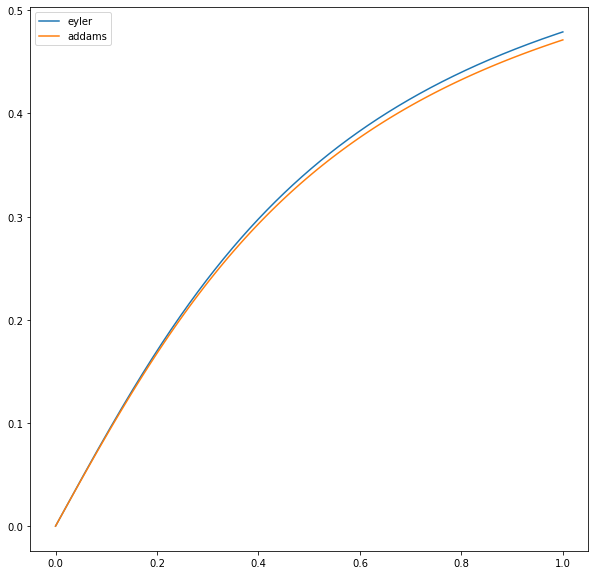

In [50]:
fig, ax = plt.subplots()

#df = lambda x, y: x**2 - 2*y
#y0 = 1
eyler = Eyler(df, y_0, 1000)
range_kytt = Range_Kytt(df, y0, 10)
Y = [3/4*np.exp(-2*x)+x**2/2-x/2 + 1/4 for x in range_kytt[0]]
addams = Addams(df, y_0)

print(max([abs(Y[i] - range_kytt[1][i]) for i in range(len(Y))]))

#ax.plot(range_kytt[0], Y, label='func')
ax.plot(eyler[0], eyler[1], label='eyler')
#ax.plot(range_kytt[0], range_kytt[1], label='range_kytt')
ax.plot(addams[0], addams[1], label='addams')
leg = ax.legend()